## DAB200 -- Graded Lab 1

In this lab, you will gain some experience in **denoising** a dataset in the context of a specific objective. 

**Overall Objective**: Create a model that predicts rent prices as well as possible for typical New York City apartments.

**Data set**: make sure you use the data with the same number as your group number!

| Group | Data set |
| :-: | :-: |
| 1 | rent_1.csv |
| 2 | rent_2.csv |
| etc. | etc. |

**Important Notes:**
 - This lab is more open-ended so be prepared to think on your own, in a logical way, in order to solve the problem at hand
     - You should be able to support any decision you make with logical evidence
 - The data looks like the data we have been using in class but it has other **surprises**
     - Be sure to investigate the data in a way that allows you to discover all these surprises
 - Use [Chapter 5](https://mlbook.explained.ai/prep.html) of the textbook as a **guide**, except:
     - you only need to use **random forest** models;
     - exclude Section 5.5; 
 - Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
 - Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
 - Don't make assumptions!

I have broken the lab down into 4 main parts. 

### Part 0

Please provide the following information:
 - Group Number: 8 
 - Group Members
     - Vishant Bhatia (0798567)
     - Tulaib Bin Ayyub (0789141)
     - Faizal Akram Shaikh (0816124)
     - Mahima Mehandiratta (0801962)

     

### Part 1 - Create and evaluate an initial model

#### Code (15 marks)

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_rent = pd.read_csv('rent_8.csv')

In [30]:
print(df_rent.shape)

(20000, 15)


In [27]:
df_rent.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,photos,price,street_address,interest_level,num_desc_words
0,1.0,1,ec0d62637d75f9d7207d9f9bbc939a28,2016-05-10 03:31:32,MARVELOUS one bedroom in Upper East Side...sho...,E 95 Street,['Hardwood Floors'],40.7827,-73.9461,ed17ada77c1b94b4fb00d126a0c2ea06,[],1850,332 E 95 Street,1,30
1,1.0,2,0,2016-06-17 01:22:53,Gorgeous 2 bedroom (Queen size bedrooms) and 1...,East 32nd Street,"['Doorman', 'Multi-Level', 'Pre-War', 'Dogs Al...",40.7471,-73.9846,ad2928226654cf28722d0dee31e54040,['https://photos.renthop.com/2/7174539_b4c0ff6...,3775,7-9 East 32nd Street,1,59
2,1.0,2,7d0a8a49b80d9329a3098b15ac8fd1bc,2016-05-20 04:44:27,A FABULOUS 2BR IN MIDTOWN WEST! PERFECT APARTM...,W 50 Street,"['Dogs Allowed', 'Cats Allowed']",40.7644,-73.9905,145890e44cab8515300fe58471452f95,['https://photos.renthop.com/2/7043219_43fe8bd...,4295,439 W 50 Street,1,89
3,2.0,2,9d39a277bce23e9ca6ab0e97be691e6f,2016-06-08 02:28:56,CooperCooper.com :: Web ID #145396; Access 100...,East 57th Street,"['Doorman', 'Fitness Center', 'Elevator', 'Bal...",40.7604,-73.9686,6e5c10246156ae5bdcd9b487ca99d96a,['https://photos.renthop.com/2/7123483_9505204...,5450,150 East 57th Street,1,104
4,1.0,2,8e7619f7dc4da9287b3af97aab0a53b3,2016-04-30 03:30:30,Apartment features: <br />Stainless st...,West 174th St,"['Elevator', 'Cats Allowed', 'Dogs Allowed']",40.8454,-73.9390,18b801a90df27a4ea2452b1321a541ab,['https://photos.renthop.com/2/6946353_2e67ee5...,2550,636 West 174th St,1,70


#### We are transposing the columns and rows to get clear view of the dataset.

In [3]:
df_rent.head(5).T

,0,1,2,3,4
bathrooms,1.0,1.0,1.0,2.0,1.0
bedrooms,1,2,2,2,2
building_id,ec0d62637d75f9d7207d9f9bbc939a28,0,7d0a8a49b80d9329a3098b15ac8fd1bc,9d39a277bce23e9ca6ab0e97be691e6f,8e7619f7dc4da9287b3af97aab0a53b3
created,2016-05-10 03:31:32,2016-06-17 01:22:53,2016-05-20 04:44:27,2016-06-08 02:28:56,2016-04-30 03:30:30
description,MARVELOUS one bedroom in Upper East Side...sho...,Gorgeous 2 bedroom (Queen size bedrooms) and 1...,A FABULOUS 2BR IN MIDTOWN WEST! PERFECT APARTM...,CooperCooper.com :: Web ID #145396; Access 100...,Apartment features: <br />Stainless st...
display_address,E 95 Street,East 32nd Street,W 50 Street,East 57th Street,West 174th St
features,['Hardwood Floors'],"['Doorman', 'Multi-Level', 'Pre-War', 'Dogs Al...","['Dogs Allowed', 'Cats Allowed']","['Doorman', 'Fitness Center', 'Elevator', 'Bal...","['Elevator', 'Cats Allowed', 'Dogs Allowed']"
latitude,40.7827,40.7471,40.7644,40.7604,40.8454
longitude,-73.9461,-73.9846,-73.9905,-73.9686,-73.939
manager_id,ed17ada77c1b94b4fb00d126a0c2ea06,ad2928226654cf28722d0dee31e54040,145890e44cab8515300fe58471452f95,6e5c10246156ae5bdcd9b487ca99d96a,18b801a90df27a4ea2452b1321a541ab


In [4]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        20000 non-null  float64
 1   bedrooms         20000 non-null  int64  
 2   building_id      20000 non-null  object 
 3   created          20000 non-null  object 
 4   description      19391 non-null  object 
 5   display_address  19934 non-null  object 
 6   features         20000 non-null  object 
 7   latitude         20000 non-null  float64
 8   longitude        20000 non-null  float64
 9   manager_id       20000 non-null  object 
 10  photos           20000 non-null  object 
 11  price            20000 non-null  int64  
 12  street_address   19996 non-null  object 
 13  interest_level   20000 non-null  int64  
 14  num_desc_words   20000 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 2.3+ MB


In [1]:
df_rent['interest_level'].unique()

NameError: name 'df_rent' is not defined

In [7]:
df_rent.describe()

,bathrooms,bedrooms,latitude,longitude,price,interest_level,num_desc_words
count,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000
mean,1.209850,1.542700,40.514548,-67.830865,3.538713e+03,1.26995,87.634950
std,0.499575,1.119214,4.987450,28.338739,8.549412e+03,0.91876,59.131545
min,0.000000,0.000000,0.000000,-118.271000,-1.700000e+04,-3.00000,0.000000
25%,1.000000,1.000000,40.726600,-73.990900,2.450000e+03,1.00000,48.000000
50%,1.000000,1.000000,40.752100,-73.976000,3.100000e+03,1.00000,81.000000
75%,1.000000,2.000000,40.775400,-73.952300,4.000000e+03,2.00000,118.000000
max,7.000000,7.000000,58.321800,88.289200,1.150000e+06,3.00000,518.000000


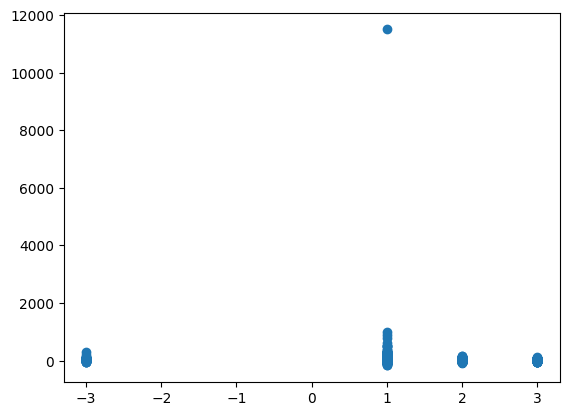

In [8]:
plt.scatter(df_rent.interest_level,df_rent.price/100)

### To train a model, the data set must follow two fundamental rules: all data must be numeric and there can't be any missing values. 

Therefore, we cannot take the features that are non-numeric (such as building_id, description, display_address, etc.).

Although the feature 'interest_level' is numeric but if we try to find the relation between 'interest_level' and our target 'price', then we conclude from the above scatter plot that there is no relationship between them. So we drop such features and consider only 'bathrooms', 'bedrooms', 'longitude', 'latitude' and 'price' to continue further.



In [7]:
df_rent_new = df_rent[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price']]

In [8]:
df_rent_new.head()

,bathrooms,bedrooms,longitude,latitude,price
0,1.0,1,-73.9461,40.7827,1850
1,1.0,2,-73.9846,40.7471,3775
2,1.0,2,-73.9905,40.7644,4295
3,2.0,2,-73.9686,40.7604,5450
4,1.0,2,-73.9390,40.8454,2550


In [9]:
print(df_rent_new.price.sort_values(ascending=True).head(10))

4832    -17000
13480   -13995
16635   -11500
19627   -11250
2095    -10000
8042     -9500
8700     -9000
16401    -8495
6826     -8000
18972    -7495
Name: price, dtype: int64


In [10]:
print(df_rent_new.isnull().any())

bathrooms    False
bedrooms     False
longitude    False
latitude     False
price        False
dtype: bool


 It is clear that the features we are considering do not have any null values.

#### Our data set follows the fundamental rules to train a model. Hence, we can proceed further and train our model.

In [12]:
X = df_rent_new.drop('price',axis = 1)
y = df_rent_new['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=1010)
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=1010)

In [14]:
R_Square = rf.score(X_train,y_train)

print(f"R square score for training data {R_Square:.4f}")
print(f"R square score for Validating data {rf.score(X_test,y_test):.4f}")

R square score for training data 0.8868
R square score for Validating data 0.5453


#### R square score for training and testing (validating) data clearly states that there is a possible relationship between the feature values and the target value which is captured by Random Forest model.

#### We will now train our model with oob_score = True and find out a measure of the model's performance on unseen data.

In [39]:
rf_oob = RandomForestRegressor(n_estimators= 100, n_jobs=-1, oob_score=True,random_state=1010)
rf_oob.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=1010)

In [40]:
print(f"OOB score {rf_oob.oob_score_:.4f}")

OOB score 0.0384


The **out-of-bag** score is very low, approximately as bad as just predicting the mean apartment price.
We will now check its MAE (Mean Absolute Error) and prove that it will also be very terrible.


In [44]:
X, y = df_rent_new.drop('price', axis=1), df_rent_new['price']
errors_train = []
errors_test = []
error_train_per = []
error_test_per = []
oob_score = []
#print(f"Validation MAE trials:", end='')
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, random_state=1010)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    y_predicted = rf.predict(X_test)
    oob_score.append(round(rf.oob_score_ ,4))
    e_train = round(mean_absolute_error(y_train,train_pred),2)
    e_test = round(mean_absolute_error(y_test, y_predicted),2)
    error_train = e_train * 100/ y.mean()
    error_test = e_test * 100 / y.mean() 
    #print(f" ${e:.0f}", end='')
    errors_train.append(e_train)
    errors_test.append(e_test)
    error_train_per.append(error_train)
    error_test_per.append(error_test)
    
print()
print("Training MAE Score : \n",errors_train)
print("Validation MAE Score : \n",errors_test)
noisy_avg_mean_train = np.mean(errors_train)
noisy_avg_mae_test = np.mean(errors_test)
print(f"Average Training MAE ${noisy_avg_mean_train: .0f}")
print(f"{np.mean(error_train_per):.2f}% Average error in training ")
print(f"Average Validation MAE ${noisy_avg_mae_test:.0f}")
print(f"{np.mean(error_test_per):.2f}% Average error in validation")
print("OOB Score : \n",oob_score)
print(f"{np.mean(oob_score):.4f} Average OOB Score")


Training MAE Score : 
 [461.96, 451.66, 461.39, 453.48, 441.79, 446.93, 449.37, 444.73, 450.79, 462.05]
Validation MAE Score : 
 [730.58, 705.08, 691.95, 768.73, 744.36, 756.88, 754.5, 749.01, 738.93, 711.52]
Average Training MAE $ 452
12.78% Average error in training 
Average Validation MAE $735
20.77% Average error in validation
OOB Score : 
 [0.0347, 0.024, 0.0298, 0.0322, 0.0219, 0.0421, 0.0408, 0.0425, 0.0411, 0.0319]
0.0341 Average OOB Score


#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 1** in the context of the overall objective. 

#### With higher MAE, lower OOB score of the validation data and R square value coming from the Random Forest indicate that model trained on the raw data set gets poor results. 

#### Given the strength of RF model, poor performance indicates that there is no to little relationship to capture between feature (apartment characteristics) and target value(rent price) or it could mean that data is either inconsistent or it has outliers.
#### But it shows high error in case of validation data only and not for training data. Thus, we can conclude that the data set has outliers or is inconsistent.

### Part 2 - Denoise the data

This section should only include the code necessary to **denoise** the data, NOT the code necessary to identify inconsistencies, problems, errors, etc. in the data. 

#### Code (25 marks)

In [45]:
df_rent_new

,bathrooms,bedrooms,longitude,latitude,price
0,1.0,1,-73.9461,40.7827,1850
1,1.0,2,-73.9846,40.7471,3775
2,1.0,2,-73.9905,40.7644,4295
3,2.0,2,-73.9686,40.7604,5450
4,1.0,2,-73.9390,40.8454,2550
...,...,...,...,...,...
19995,1.0,2,-74.0095,40.7162,4200
19996,1.0,1,-73.9705,40.7957,4300
19997,3.0,5,-73.9814,40.7418,10000
19998,2.0,3,-73.9532,40.7816,3795


In [46]:
pd.options.display.float_format = '{:20,.2f}'.format

In [47]:
df_rent_new.describe()

,bathrooms,bedrooms,longitude,latitude,price
count,"20,000.00","20,000.00","20,000.00","20,000.00","20,000.00"
mean,1.21,1.54,-67.83,40.51,"3,538.71"
std,0.50,1.12,28.34,4.99,"8,549.41"
min,0.00,0.00,-118.27,0.00,"-17,000.00"
25%,1.00,1.00,-73.99,40.73,"2,450.00"
50%,1.00,1.00,-73.98,40.75,"3,100.00"
75%,1.00,2.00,-73.95,40.78,"4,000.00"
max,7.00,7.00,88.29,58.32,"1,150,000.00"


In [56]:
print(df_rent_new.price.sort_values(ascending=True).head(500))

4832    -17000
13480   -13995
16635   -11500
19627   -11250
2095    -10000
         ...  
12674      695
2577       695
5964       700
11960      800
14122      868
Name: price, Length: 500, dtype: int64


In [57]:
df_rent_new[df_rent_new['bathrooms']>=5]

,bathrooms,bedrooms,longitude,latitude,price
441,5.00,5,88.29,14.18,36000
1352,7.00,5,-74.00,40.73,60000
1550,6.00,6,-73.98,40.77,100000
2936,6.50,7,15.65,58.32,14500
3218,5.00,5,-73.95,40.78,13500
3635,5.00,4,-73.96,40.78,27000
4775,5.00,4,-74.01,40.71,27300
5458,5.00,4,-73.99,40.77,20000
9236,5.50,4,-73.95,40.77,30000
10419,5.00,5,-73.97,40.69,14500


In [58]:
print(df_rent_new.price.sort_values(ascending=False).head(5))

17796    1150000
1550      100000
280        90000
4693       80000
1352       60000
Name: price, dtype: int64


In [59]:
df_rent_new[(df_rent_new['longitude'] == 0.0) & (df_rent_new['latitude'] == 0.0)]

,bathrooms,bedrooms,longitude,latitude,price
5048,1.00,2,0.00,0.00,3200
5595,1.00,1,0.00,0.00,3495


In [60]:
df_rent_new.loc[df_rent_new['longitude']==88.289200]

,bathrooms,bedrooms,longitude,latitude,price
30,1.00,1,88.29,14.18,1795
83,1.00,2,88.29,14.18,2995
126,1.00,0,88.29,14.18,1795
127,1.00,1,88.29,14.18,3600
175,1.00,2,88.29,14.18,3200
...,...,...,...,...,...
19880,1.00,3,88.29,14.18,4650
19907,1.00,2,88.29,14.18,3195
19921,1.00,1,88.29,14.18,2600
19924,1.00,2,88.29,14.18,3500


In [61]:
df_rent_new.loc[df_rent_new['bedrooms']==0]

,bathrooms,bedrooms,longitude,latitude,price
10,1.00,0,-73.98,40.74,2200
16,1.00,0,-73.99,40.77,3483
17,1.00,0,-73.98,40.75,2600
39,1.00,0,-73.94,40.78,1895
51,1.00,0,-74.00,40.76,2660
...,...,...,...,...,...
19949,1.00,0,-73.95,40.78,2265
19979,1.00,0,-73.97,40.70,1700
19986,1.00,0,-73.96,40.76,2700
19991,1.00,0,-73.96,40.82,-1795


In [62]:
print(df_rent_new.bedrooms.value_counts())

1    6383
2    5916
0    3846
3    2947
4     770
5     111
6      26
7       1
Name: bedrooms, dtype: int64


In [31]:
print(df_rent_new.bathrooms.value_counts())

1.00    16025
2.00     3088
3.00      284
1.50      253
0.00      123
2.50      104
4.00       71
3.50       28
5.00       11
4.50        7
5.50        3
7.00        1
6.00        1
6.50        1
Name: bathrooms, dtype: int64


#### We are not removing the rows where there are 7 bedrooms or 4.5, 5.5, 6, 6.5, 7 bathrooms as they constitute 0.01% of the data set that we have and would not affect the mean as such.

#### How can the price be negative? It might have been mistakenly added. So, we can delete those rows of negative values but before that we have to check the count of negative values and it is more than 500 rows it means we can't delete those rows. 
#### Secondly, values of longitude are both negative and positive which means that it is from both East and West of the Prime Meridian. 
#### Moreover, latitude of zero means something near the Equator. 
#### Rows 5048 and 5595 have both longitude and latitude equal to zero, which means that it is a Null Island  where both Prime Meridian and Equator intersect. Thus, we can delete these rows. 
#### Longitude = 88.2892 and Latitude = 14.1838 is is near South of India. But we are delaing with the apartments in New York city. Therefore, such rows can also be deleted.

#### Outliers are values in the feature or target space (range) that have magnitudes that are significantly out of the ordinary. However, some data sets contain outliers that are valid numbers, as is the case here. Outliers may also be the consequence of noise. There are undoubtedly some really costly apartments in New York City, as well as a few flats that range from those to the just very expensive ones.

#### There are 3846 apartments having zero bedrooms. It might be studio apartments.

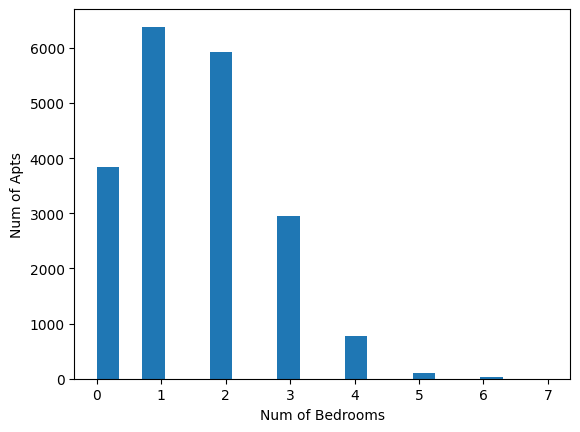

In [48]:
fig,ax = plt.subplots()
ax.set_xlabel('Num of Bedrooms')
ax.set_ylabel('Num of Apts')
ax.hist(df_rent_new.bedrooms, bins=20)
plt.show()

#### Anamoly 1 

In [49]:
df_rent_new['price'] = df_rent_new['price'].abs()

C:\Users\visha\AppData\Local\Temp\ipykernel_5600\447392037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_new['price'] = df_rent_new['price'].abs()


In [50]:
df_rent_new

,bathrooms,bedrooms,longitude,latitude,price
0,1.00,1,-73.95,40.78,1850
1,1.00,2,-73.98,40.75,3775
2,1.00,2,-73.99,40.76,4295
3,2.00,2,-73.97,40.76,5450
4,1.00,2,-73.94,40.85,2550
...,...,...,...,...,...
19995,1.00,2,-74.01,40.72,4200
19996,1.00,1,-73.97,40.80,4300
19997,3.00,5,-73.98,40.74,10000
19998,2.00,3,-73.95,40.78,3795


In [51]:
print(df_rent_new.price.sort_values(ascending=True).head(20))

6301      401
2577      695
12674     695
5964      700
11960     800
14122     868
2485      950
11582     950
3852      999
3167     1000
16473    1025
1420     1034
3344     1048
5011     1050
13078    1050
16305    1050
2177     1095
11531    1100
11089    1100
2767     1100
Name: price, dtype: int64


#### We are checking where our most of data lies.

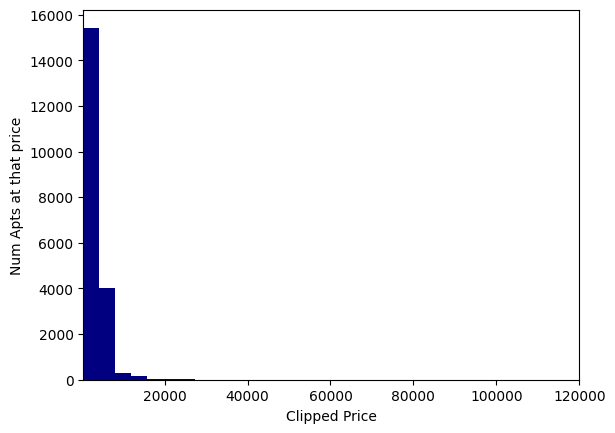

In [52]:
fig,ax = plt.subplots()
ax.set_xlabel('Clipped Price')
ax.set_ylabel('Num Apts at that price')
ax.hist(df_rent_new.price,bins = 300, color='navy')
plt.xlim(xmin=400, xmax = 120000)

plt.show()
# here we are not getting clear picture of histogram 

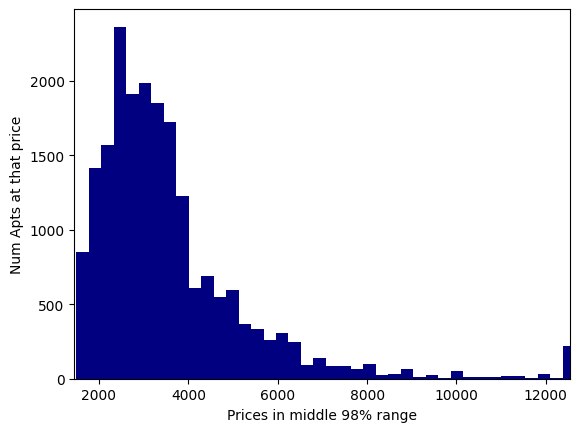

In [53]:
upper, lower = np.percentile(df_rent_new.price, [1,99]) # find middle 98% of prices
clipped = np.clip(df_rent_new.price, upper, lower)
fig,ax = plt.subplots()
ax.set_xlabel('Prices in middle 98% range')
ax.set_ylabel('Num Apts at that price')
ax.hist(clipped, bins=40, color='navy')
plt.xlim(xmin=1450, xmax = 12550)

plt.show()

#### We are considering the apartments where the price range is where most of the data (98%) lies.

In [54]:
df_rent_clean = df_rent_new[(df_rent_new['price'] >= 1450) & (df_rent_new['price'] <= 12550)]

In [55]:
df_rent_clean.reset_index(drop=True,inplace=True)
df_rent_clean

,bathrooms,bedrooms,longitude,latitude,price
0,1.00,1,-73.95,40.78,1850
1,1.00,2,-73.98,40.75,3775
2,1.00,2,-73.99,40.76,4295
3,2.00,2,-73.97,40.76,5450
4,1.00,2,-73.94,40.85,2550
...,...,...,...,...,...
19642,1.00,2,-74.01,40.72,4200
19643,1.00,1,-73.97,40.80,4300
19644,3.00,5,-73.98,40.74,10000
19645,2.00,3,-73.95,40.78,3795


In [56]:
df_rent_clean = df_rent_clean[(df_rent_new['latitude'] > 40.55) & \
                          (df_rent_new['latitude'] < 40.94) & \
                          (df_rent_new['longitude'] > -74.10) & \
                          (df_rent_new['longitude'] < -73.67)]



C:\Users\visha\AppData\Local\Temp\ipykernel_5600\3874012889.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rent_clean = df_rent_clean[(df_rent_new['latitude'] > 40.55) & \


In [57]:
df_rent_clean.reset_index(drop=True,inplace=True)
df_rent_clean

,bathrooms,bedrooms,longitude,latitude,price
0,1.00,1,-73.95,40.78,1850
1,1.00,2,-73.98,40.75,3775
2,1.00,2,-73.99,40.76,4295
3,2.00,2,-73.97,40.76,5450
4,1.00,2,-73.94,40.85,2550
...,...,...,...,...,...
18672,1.00,2,-74.01,40.72,4200
18673,1.00,1,-73.97,40.80,4300
18674,3.00,5,-73.98,40.74,10000
18675,2.00,3,-73.95,40.78,3795


#### Comparing the datasets before and after denoising.

In [58]:
df_rent_new.shape

(20000, 5)

In [59]:
df_rent_clean.shape

(18677, 5)

In [60]:
print(f"{(df_rent_new.shape[0] - df_rent_clean.shape[0])/df_rent_new.shape[0] *100:.2f} % " )

6.62 % 


#### Backup Data

In [61]:
df_rent_new2 = df_rent_clean.copy() 

In [62]:
df_rent_new2

,bathrooms,bedrooms,longitude,latitude,price
0,1.00,1,-73.95,40.78,1850
1,1.00,2,-73.98,40.75,3775
2,1.00,2,-73.99,40.76,4295
3,2.00,2,-73.97,40.76,5450
4,1.00,2,-73.94,40.85,2550
...,...,...,...,...,...
18672,1.00,2,-74.01,40.72,4200
18673,1.00,1,-73.97,40.80,4300
18674,3.00,5,-73.98,40.74,10000
18675,2.00,3,-73.95,40.78,3795


In [63]:
print(df_rent_clean.price.sort_values(ascending=False).head(20))

9268     12500
11983    12500
12714    12500
4905     12500
18447    12500
18462    12500
13624    12500
15616    12500
14864    12495
4294     12495
8139     12455
15567    12450
5998     12450
626      12400
3746     12295
2683     12250
6500     12200
14096    12165
1064     12000
7877     12000
Name: price, dtype: int64


### Part 3 - Create and evaluate a final model

#### Code (15 marks)

In [64]:
df_rent_clean

,bathrooms,bedrooms,longitude,latitude,price
0,1.00,1,-73.95,40.78,1850
1,1.00,2,-73.98,40.75,3775
2,1.00,2,-73.99,40.76,4295
3,2.00,2,-73.97,40.76,5450
4,1.00,2,-73.94,40.85,2550
...,...,...,...,...,...
18672,1.00,2,-74.01,40.72,4200
18673,1.00,1,-73.97,40.80,4300
18674,3.00,5,-73.98,40.74,10000
18675,2.00,3,-73.95,40.78,3795


In [65]:
X = df_rent_clean.drop('price',axis = 1)
y = df_rent_clean['price']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=1010)
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=1010)

In [67]:
R_Square = rf.score(X_train,y_train)

print(f"R square score for training data {R_Square:.4f}")
print(f"R square score for Validating data {rf.score(X_test,y_test):.4f}")

R square score for training data 0.9365
R square score for Validating data 0.8191


In [68]:
rf_oob = RandomForestRegressor(n_estimators= 100, n_jobs=-1, oob_score=True,random_state=1010)
rf_oob.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=1010)

In [69]:
print(f"OOB score {rf_oob.oob_score_:.4f}")

OOB score 0.7945


In [70]:
X, y = df_rent_clean.drop('price', axis=1), df_rent_clean['price']
errors_train = []
errors_test = []
error_train_per = []
error_test_per = []
oob_score = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, random_state=1010)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    y_predicted = rf.predict(X_test)
    oob_score.append(round(rf.oob_score_ ,4))
    e_train = round(mean_absolute_error(y_train,train_pred),2)
    e_test = round(mean_absolute_error(y_test, y_predicted),2)
    error_train = e_train * 100/ y.mean()
    error_test = e_test * 100 / y.mean()
    errors_train.append(e_train)
    errors_test.append(e_test)
    error_train_per.append(error_train)
    error_test_per.append(error_test)
print()
print("Training MAE Score : \n",errors_train)
print("Validation MAE Score : \n",errors_test)
noisy_avg_mean_train = np.mean(errors_train)
noisy_avg_mae_test = np.mean(errors_test)
print(f"Average Training MAE ${noisy_avg_mean_train: .0f}")
print(f"{np.mean(error_train_per):.2f}% Average error in training ")
print(f"Average Validation MAE ${noisy_avg_mae_test:.0f}")
print(f"{np.mean(error_test_per):.2f}% Average error in validation")
print("OOB Score : \n",oob_score)
print(f"{np.mean(oob_score):.4f} Average OOB Score")


Training MAE Score : 
 [220.99, 218.88, 223.55, 219.09, 220.89, 222.34, 220.63, 220.62, 220.32, 221.87]
Validation MAE Score : 
 [394.69, 402.18, 380.01, 409.43, 393.58, 392.52, 392.68, 400.34, 386.41, 395.22]
Average Training MAE $ 221
6.29% Average error in training 
Average Validation MAE $395
11.24% Average error in validation
OOB Score : 
 [0.8006, 0.8024, 0.8002, 0.8015, 0.8002, 0.7946, 0.7981, 0.8048, 0.8028, 0.8027]
0.8008 Average OOB Score


#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 3** in the context of the overall objective. 

### Here we see that once we have denoised the data, the random forest model is trained to minimize the error between the predicted values and the actual values. 
### Here we are using Mean absolute error which measures the average absolute difference between the predicted values and the actual values and also since it's robust to outliers since the difference is not getting squared unlike mean squared error.
### The Random forest model builds a set of decision trees that can make predictions for new input data. Each decision tree is being trained on random subset of input features and random subset of the training data. The final prediction is the average of the predictions from all the individual decision trees in the forest.
### In our case the final MAE score is the average of 10 different randomly picked training subsets and validations subsets respectively.
### By denoising the data and using a random forest regression model that minimizes the error or mean absolute error, we can improve the accuracy of our predictions and make better decisions based on the data.

### Part 4 - Document the problems (35 marks)

In this part, please use the table below to document your understanding of all the data issues you discovered. Note that **no code** should be included, as that should be covered in **Part 2**. Also, note that even if one line of code fixed a few problems, you should list each problem separately in the table below, so be sure you have investigated the data properly. For example, if the list `[-6, 5, 0, 50]` represents heights of adults, the -6, 0, and 50 would represent three data issues to be included in the table below, even though one line of code may be able to address all of them. 

| Data issue discovered | Why is this a problem? | How did you fix it? | Why is this fix appropriate? |
| :- | :- | :- | :- | 
|  Abnormal Prices 1 | The rent prices corresponding to some apartments are negative which could have been an input error but leads to inconsistency in the data.   | The absolute of the rent prices that were negative was considered.  | To ensure the accuracy and reliability of the rent prediction model, it is necessary to remove or correct any negative values. By doing so, the prediction model will not be influenced by these erroneous negative values, and the output will reflect a more accurate representation of rent prices.   |
|  Abnormal Prices 2  | Some apartments are undervalued while some are overvalued. As a result of which, the data becomes inconsistent.  | The range where 98% of the apartments were priced was found out and only those apartments that lie in that range were considered for the final model. | Extreme values of rent can have a significant impact on the statistical measures such as mean used to analyze the data and make accurate predictions.   |
|Apartments outside New York City|We have some apartments that are located in South of India. But since we are dealing with just the apartments in New York, the apartments not located in New York should not belong to the data set.|Rows with the latitude and longitude not corresponding to New York City were removed from the data set. |The fix is appropriate as we are predicting the rent prices of the apartments located in New York.|
|Location near the equator| Some apartments have the location near the equator that is, a latitude of zero. But we are dealing with just the apartments in New York, the apartments not located in New York should not belong to the data set.| Rows with the latitude values were not considered for final model. |The fix is appropriate as we are predicting the rent prices of the apartments located in New York.|
|Apartment at Null Island| 2 apartments have both latitude and longitude value of zero, the location of Null Island and not New York.| Rows with the latitude values were not considered for final model. |The fix is appropriate as we are predicting the rent prices of the apartments located in New York.|
